### Filtering Dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import re
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

C:\Users\Karan Mehta\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_final2 = pd.read_parquet("C:/Users/Karan Mehta/Downloads/NLP Final/CleanedDataset.parquet")
df_final2.head(5)

,url,date,language,title,text,year,cleaned,clean_title,relevant,tokens,no_tokens
0,http://galusaustralis.com/2020/02/486473/legaltech-artificial-intelligence-market-2019-technology-advancement-and-future-scope-casetext-inc-catalyst-repository-systems-ebrevia/,2020-02-26,en,"LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis","LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis \n\nGalus Australis\n\nBusine...",2020,"LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope Casetext Inc., Catalyst Repository Systems, eBREVIA Galus Australis Galus Australis BusinessGene...","LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope Casetext Inc., Catalyst Repository Systems, eBREVIA Galus Australis Galus Australis BusinessGene...",1,"[LegalTech, Artificial, Intelligence, Market, 2019, Technology, Advancement, and, Future, Scope, Casetext, Inc., ,, Catalyst, Repository, Systems, ,, eBREVIA, Galus, Australis, Galus, Australis, B...",1087
2,http://www.agoravox.it/Covid-19-un-messaggio-dai.html,2020-03-13,en,Covid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia,\n\n\nCovid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia\n\nAccedi\n\nPartecipa ad AgoraVox!\nIscriviti e proponi un articolo\nHome page\n\n\nAttualitÃ \n\n\nA...,2020,Covid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia Accedi Partecipa ad AgoraVox! Iscriviti e proponi un articolo Home page Attualit Ambiente Cronaca Cronaca ...,Covid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia Accedi Partecipa ad AgoraVox! Iscriviti e proponi un articolo Home page Attualit Ambiente Cronaca Cronaca ...,1,"[Covid-19, :, un, messaggio, dai, ricercatori, italiani, ai, colleghi, stranieri, -, AgoraVox, Italia, Accedi, Partecipa, ad, AgoraVox, !, Iscriviti, e, proponi, un, articolo, Home, page, Attualit...",2455
4,http://www.millenniumpost.in/big-stories/ai-express-aircraft-skids-off-runaway-in-kozhikode-rescue-ops-on-414926,2020-08-07,en,Two dead as AI Express flight skids off Kozhikode airport,Two dead as AI Express flight skids off Kozhikode airportTopLoginSubscribeToggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGl...,2020,Two dead as AI Express flight skids off Kozhikode airportTop Toggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGlobal EyeInla...,Two dead as AI Express flight skids off Kozhikode airportTopLoginSubscribeToggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGl...,1,"[Two, dead, as, AI, Express, flight, skids, off, Kozhikode, airportTop, Toggle, navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday, PostBeyond, BygoneEpic, PowerIn, Retrospec...",280
7,http://www.peripherals.consumerelectronicsnet.com/multicoreware-inc-becomes-cevas-trusted-partner-for-imaging-computer-vision/,2021-02-25,en,MulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net,\n\nMulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net\n\n \nSkip to content\n\nConsumer Electronics Net\n\nPrimary Menu\n\nConsumer Electro...,2021,MulticoreWare Inc. Becomes CEVA s Trusted Partner for Imaging & Computer Vision Consumer Electronics Net Skip to content Consumer Electronics Net Primary Menu Consumer Electronics Net for: ...,MulticoreWare Inc. Becomes CEVA s Trusted Partner for Imaging & Computer Vision Consumer Electronics Net Skip to content Consumer Electronics Net Primary Menu Consumer 

In [3]:
duplicate_rows = df_final2[df_final2.duplicated(subset='text')]

In [4]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185245 entries, 0 to 200434
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   url          185245 non-null  object        
 1   date         185245 non-null  datetime64[ns]
 2   language     185245 non-null  object        
 3   title        185245 non-null  object        
 4   text         185245 non-null  object        
 5   year         185245 non-null  int32         
 6   cleaned      185245 non-null  object        
 7   clean_title  185245 non-null  object        
 8   relevant     185245 non-null  int32         
 9   tokens       185245 non-null  object        
 10  no_tokens    185245 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 15.5+ MB


In [5]:
# Dropping duplicate articles (638 articles)
df_final2 = df_final2.drop_duplicates(subset='text')

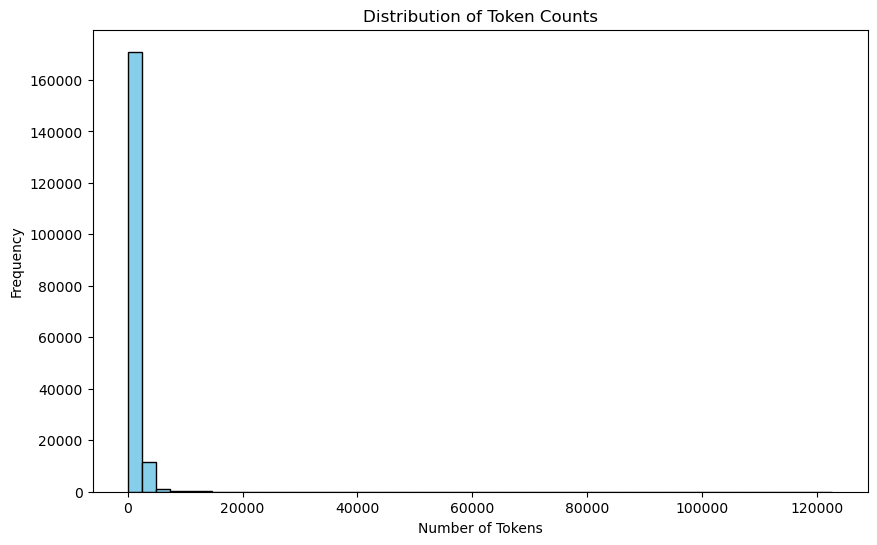

In [6]:
token_counts = df_final2['no_tokens']

plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Token Counts')
plt.show()

In [7]:
mean_num_tokens = df_final2['tokens'].apply(len).mean()
print("Mean number of tokens:", mean_num_tokens)

Mean number of tokens: 1389.2543457182014


In [8]:
tmp = df_final2['tokens'].apply(len)
tmp.describe()

count    184607.000000
mean       1389.254346
std        1113.813258
min           5.000000
25%         835.000000
50%        1159.000000
75%        1672.000000
max      122704.000000
Name: tokens, dtype: float64

In [9]:
count_tokens_greater_than_threshold = (df_final2['no_tokens'] >= 7000).sum()
print("Count of rows with no_tokens:", count_tokens_greater_than_threshold)

Count of rows with no_tokens: 1088


In [10]:
# Analysing relevance of articles with tokens more than 7000
df_more_than_threshold = df_final2[df_final2['no_tokens'] >= 7000]
df_more_than_threshold.head(5)

,url,date,language,title,text,year,cleaned,clean_title,relevant,tokens,no_tokens
211,https://techreport.com/artificial-intelligence/writesonic-review/,2023-10-27,en,Complete Writesonic Review for 2023 — Better Than ChatGPT,\n\nComplete Writesonic Review for 2023 — Better Than ChatGPT\n \n\nNews\n\nMain menuNews\nTech News\nCrypto News\n\n\nSoftware\n\nMain menuSoftware\nSpy Apps\n\nMain menuSpy Apps\nBest Spy Apps\n...,2023,Complete Writesonic Review for 2023 Better Than ChatGPT News Main menuNews Tech News Crypto News Software Main menuSoftware Spy Apps Main menuSpy Apps Best Spy Apps Main menuBest Spy Apps Best...,Complete Writesonic Review for 2023 Better Than ChatGPT News Main menuNews Tech News Crypto News Software Main menuSoftware Spy Apps Main menuSpy Apps Best Spy Apps Main menuBest Spy Apps Best...,1,"[Complete, Writesonic, Review, for, 2023, Better, Than, ChatGPT, News, Main, menuNews, Tech, News, Crypto, News, Software, Main, menuSoftware, Spy, Apps, Main, menuSpy, Apps, Best, Spy, Apps, Main...",7818
233,https://vc.ru/hr/936085-microsoft-poluchit-mesto-nablyudatelya-bez-prava-golosa-v-obnovlennom-sovete-direktorov-openai?from=rss,2023-11-30,en,Microsoft получит место «наблюдателя без права голоса» в обновлённом совете директоров OpenAI — Карьера на vc.ru,"\n\n\nMicrosoft получит место «наблюдателя без права голоса» в обновлённом совете директоров OpenAI — Карьера на vc.ru\n\n {""isRegardCpuComplete"":false,""hasAccess"":false} \n\n ...",2023,"Microsoft OpenAI vc.ru {""isRegardCpuComplete"":false,""hasAccess"":false} ...","Microsoft OpenAI vc.ru {""isRegardCpuComplete"":false,""hasAccess"":false} ...",1,"[Microsoft, OpenAI, vc.ru, {, ``, isRegardCpuComplete, '', :, false, ,, '', hasAccess, '', :, false, }, 1, Microsoft, OpenAI, ,, ., OpenAI, ,, ,, The, Verge, ., ,, ,, ., ., Microsoft, ., ., ,, Quo...",7811
361,https://www.dailymail.co.uk/health/article-12093681/The-BEST-weight-loss-diet-according-AI-week-long-plan-came-with.html,2023-05-27,en,"The BEST weight loss diet, according to AI (and the week-long plan it came up with!) | Daily Mail Online","\nThe BEST weight loss diet, according to AI (and the week-long plan it came up with!) | Daily Mail Online\n\n \n\n \nHome\n\nShowbiz\n\nFemail\n\nRoyals\n\nHealth\n\nScience\n\nSports\n\nPolitic...",2023,"The BEST weight loss diet, according to AI (and the week-long plan it came up with!) | Daily Mail Online Home Showbiz Femail Royals Health Science Sports Politics U.K. Money Video Travel Shop...","The BEST weight loss diet, according to AI (and the week-long plan it came up with!) | Daily Mail Online Home Showbiz Femail Royals Health Science Sports Politics U.K. Money Video Travel Shop...",1,"[The, BEST, weight, loss, diet, ,, according, to, AI, (, and, the, week-long, plan, it, came, up, with, !, ), |, Daily, Mail, Online, Home, Showbiz, Femail, Royals, Health, Science, Sports, Politi...",14039
362,https://www.dailymail.co.uk/news/article-12500291/Headteacher-elite-girls-public-school-says-pupils-use-AI-homework-insists-fears-children-teaching-exaggerated.html?ns_mchannel=rss&ns_campaign=149...,2023-09-10,en,Headteacher at elite girls' public school says pupils should use AI to do their homework and insists fears of children cheating are exaggerated | Daily Mail Online,Headteacher at elite girls' public school says pupils should use AI to do their homework and insists fears of children cheating are exaggerated | Daily Mail Online\n\n \n\n \nHome\n\nShowbiz\n\nFe...,2023,Headteacher at elite girls' public school says pupils should use AI to do their homework and insists fears of children cheating are exaggerated | Daily Mail Online Home Showbiz Femail Royals H...,Headteacher at elite girls' public school says pupils should use AI to do their homework and insists fears of children cheating are exaggerated | Daily Mail Online Home Showbiz Femail Royals H...,1,"[Headteacher, at, elite, girls, ', public, school, says, pupils, should, use, AI, to, do, their, homework, and, 

In [11]:
count_token_lessthan_threshold = (df_final2['no_tokens'] < 240).sum()
print("Count of rows with no_tokens less than threshold:", count_token_lessthan_threshold)

Count of rows with no_tokens less than threshold: 2047


In [12]:
# Analysing relevance of articles with tokens less than 240
df_less_than_threshold = df_final2[df_final2['no_tokens'] < 240]
df_less_than_threshold.head(5)

,url,date,language,title,text,year,cleaned,clean_title,relevant,tokens,no_tokens
27,https://boxofficebuz.com/movie/je-vous-ai-compris,2022-11-23,en,Je vous ai compris | Box Office Buz,\nJe vous ai compris | Box Office Buz\nHomeMoviesShowsTrailersNewsMore LoginNot AvailableJe vous ai comprisDirectorNot AvailableScreenwriterNot AvailableRelease DateNot AvailableStudioNot Availabl...,2022,Je vous ai compris | Box Office Buz HomeMoviesShowsTrailersNewsMore Not AvailableJe vous ai comprisDirectorNot AvailableScreenwriterNot AvailableRelease DateNot AvailableStudioNot AvailableCastVi...,Je vous ai compris | Box Office Buz HomeMoviesShowsTrailersNewsMore LoginNot AvailableJe vous ai comprisDirectorNot AvailableScreenwriterNot AvailableRelease DateNot AvailableStudioNot AvailableCa...,1,"[Je, vous, ai, compris, |, Box, Office, Buz, HomeMoviesShowsTrailersNewsMore, Not, AvailableJe, vous, ai, comprisDirectorNot, AvailableScreenwriterNot, AvailableRelease, DateNot, AvailableStudioNo...",38
155,https://news.sky.com/story/just-how-risky-is-artificial-intelligence-12998980,2023-11-02,en,Just how risky is artificial intelligence? | Science & Tech News | Sky News,\n\nJust how risky is artificial intelligence? | Science & Tech News | Sky News\n\n \n\nSkip to content\nSky News - back to home\n\nWatch Live\n\nHome\n\n\nUK\n\n\nWorld\n\n\nIsrael-Hamas War\n\n\...,2023,Just how risky is artificial intelligence? | Science & Tech News | Sky News Skip to content Sky News - back to home Watch Live Home UK World Israel-Hamas War Politics US Climate Science & Tech B...,Just how risky is artificial intelligence? | Science & Tech News | Sky News Skip to content Sky News - back to home Watch Live Home UK World Israel-Hamas War Politics US Climate Science & Tech B...,1,"[Just, how, risky, is, artificial, intelligence, ?, |, Science, &, Tech, News, |, Sky, News, Skip, to, content, Sky, News, -, back, to, home, Watch, Live, Home, UK, World, Israel-Hamas, War, Polit...",185
412,https://www.fiercebiotech.com/medtech/mammography-ai-maker-icad-lays-another-28-workers-losses-grow-revenues-shrink,2023-03-28,en,Mammography AI maker iCad lays off 28% of workers,\nMammography AI maker iCad lays off 28% of workers\nFierce Pharma\n\n\nFierce Biotech\n\n\nFierce Healthcare\n\n\nFierce Life Sciences Events\n\n \n\n \n \n\nResearch\n\n\nBiotech\n\n\nClinical D...,2023,Mammography AI maker iCad lays off 28% of workers Fierce Pharma Fierce Biotech Fierce Healthcare Fierce Life Sciences Events Re Biotech Clinical Data Venture Capital Deals Medtech Devices D...,Mammography AI maker iCad lays off 28% of workers Fierce Pharma Fierce Biotech Fierce Healthcare Fierce Life Sciences Events Research Biotech Clinical Data Venture Capital Deals Medtech Devi...,1,"[Mammography, AI, maker, iCad, lays, off, 28, %, of, workers, Fierce, Pharma, Fierce, Biotech, Fierce, Healthcare, Fierce, Life, Sciences, Events, Re, Biotech, Clinical, Data, Venture, Capital, De...",159
413,https://www.fiercebiotech.com/medtech/merck-selects-saama-add-machine-learning-tech-drug-development-process,2022-08-11,en,Merck taps Saama to add AI to drug development process,\nMerck taps Saama to add AI to drug development process\nFierce Pharma\n\n\nFierce Biotech\n\n\nFierce Healthcare\n\n\nFierce Life Sciences Events\n\n \n\n \n \n\nResearch\n\n\nBiotech\n\n\nClini...,2022,Merck taps Saama to add AI to drug development process Fierce Pharma Fierce Biotech Fierce Healthcare Fierce Life Sciences Events Re Biotech Clinical Data Venture Capital Deals Medtech Devi...,Merck taps Saama to add AI to drug development process Fierce Pharma Fierce Biotech Fierce Healthcare Fierce Life Sciences Events Research Biotech Clinical Data Venture Capital Deals Medtech...,1,"[Merck, taps, Saama, to, add, AI, to, drug, development, process, Fierce, Pharma, Fierce, Biotech, Fierce, Healthcare, Fierce, Life, Sciences, Events, Re, Biotech, Clinical, Data, Venture, Capital...",149
609,https://www.law.com/radar/card/dealname-107a2ec3-b980-

In [13]:
count_rows = ((df_final2['no_tokens'] < 7000) & (df_final2['no_tokens'] > 240)).sum()
count_rows

181456

In [14]:
df_final2 = df_final2[(df_final2['no_tokens'] < 7000) & (df_final2['no_tokens'] > 240)]

In [15]:
key_tokens = ['artificial intelligence', 'machine learning', 'analytics', 'openai', 'chatgpt', 
              'nlp', 'data', 'llm', 'Autoencoders', 'Predictive model']

def calculate_percentage(text):
    count = sum(text.lower().count(token.lower()) for token in key_tokens)
    total_tokens = len(text.split())
    return (count / total_tokens) * 100 if total_tokens > 0 else 0

df_final2['percentage'] = df_final2['text'].apply(calculate_percentage)

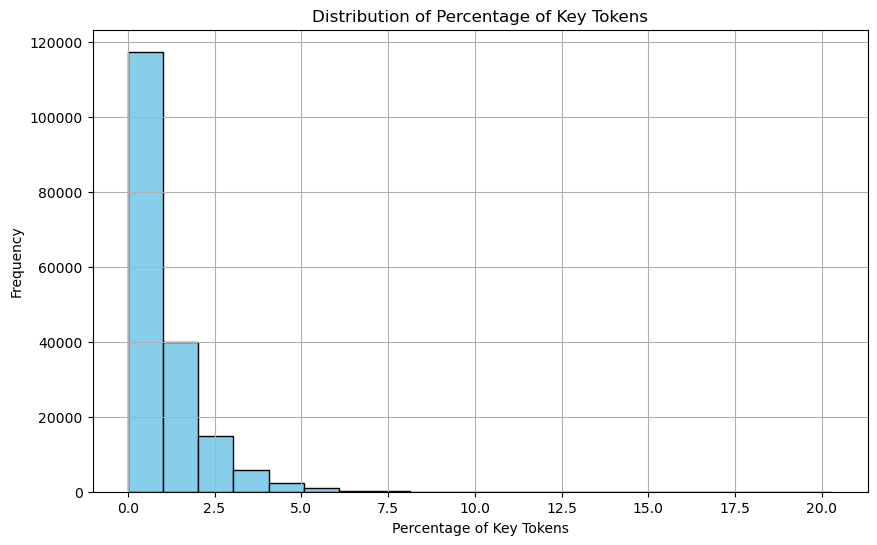

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_final2['percentage'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Percentage of Key Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage of Key Tokens')
plt.grid(True)
plt.show()

In [17]:
df_final2['percentage'].describe()

count    181456.000000
mean          1.029488
std           1.021275
min           0.000000
25%           0.339439
50%           0.695479
75%           1.359388
max          20.301624
Name: percentage, dtype: float64

In [18]:
percentile_threshold = df_final2['percentage'].quantile(0.10)

rows_below_threshold_percentile = df_final2[df_final2['percentage'] < percentile_threshold]

num_rows_below_threshold_percentile = len(rows_below_threshold_percentile)
print("Number of rows with percentage below the 25th percentile:", num_rows_below_threshold_percentile)

Number of rows with percentage below the 25th percentile: 18135


In [19]:
# Remove articles where mention of key words is below 10 percentile
df_final2 = df_final2[~df_final2.index.isin(rows_below_threshold_percentile.index)]

In [20]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163321 entries, 0 to 200434
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   url          163321 non-null  object        
 1   date         163321 non-null  datetime64[ns]
 2   language     163321 non-null  object        
 3   title        163321 non-null  object        
 4   text         163321 non-null  object        
 5   year         163321 non-null  int32         
 6   cleaned      163321 non-null  object        
 7   clean_title  163321 non-null  object        
 8   relevant     163321 non-null  int32         
 9   tokens       163321 non-null  object        
 10  no_tokens    163321 non-null  int64         
 11  percentage   163321 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(7)
memory usage: 15.0+ MB


In [21]:
df_final2.to_parquet('FilteredDataset.parquet')